In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
tt = pd.read_csv('trn_tst_test.csv',index_col=0)
oot = pd.read_csv('oot_test.csv',index_col=0)

In [3]:
def FDR3(data, predictions):
    result = data.copy()
    result['prediction'] = predictions[:,1]
    result = result.sort_values('prediction', ascending=False)
    topRows = int(round(len(result)*0.03))
    return round(result.head(topRows).Label.sum()/result.Label.sum(),4)

In [4]:
nitermax = 10

In [5]:
X = tt.iloc[:,:-1]
y = tt.iloc[:,-1]
X_oot = oot.iloc[:, :-1]

### Average performance using the best paramters

In [9]:
fdr3_train = []
fdr3_test = []
fdr3_oot = []

for niter in range(nitermax):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    model = RandomForestClassifier(bootstrap=True,
                                   max_depth=30,
                                   max_features=15,
                                   min_samples_leaf=12,
                                   min_samples_split=150,
                                   n_estimators=150,
                                   oob_score=True,
                                   n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    train, test = X_train.copy(), X_test.copy()
    train['Label'] = y_train.values
    test['Label'] = y_test.values
    
    ## predict on training set
    pred = model.predict_proba(X_train)
    fdr3_train.append(FDR3(train, pred))
    
    ## predict on test set
    pred = model.predict_proba(X_test)
    fdr3_test.append(FDR3(test, pred))
    
    ## predict on oot
    pred = model.predict_proba(X_oot)
    fdr3_oot.append(FDR3(oot, pred))

rf_df = pd.DataFrame(data=[[np.mean(fdr3_train), np.mean(fdr3_test), np.mean(fdr3_oot)]],\
                     columns=['FDR3 train', 'FDR3 test', 'FDR3 oot'])

In [281]:
len(X_train),len(X_test),len(X_oot)

(58779, 25191, 12427)

In [282]:
y_train.sum()

644

In [283]:
y_test.sum()

236

In [285]:
oot.iloc[:,-1].sum()

179

### Population bins - code written by my collegue Yuyao Shen

In [199]:
summary = pd.DataFrame()
records = []
goods = []
bads = []
per_good = []
per_bad = []
pop = []
total_record = []
cumulative_good = []
cumulative_bad = []
cum_per_good = []
cum_per_bad = []
ks_list = []
fpr_list = []
tot_record = 0
cum_good = 0
cum_bad = 0
X_train_df = pd.DataFrame()
y_pred = model.predict_proba(X_train)
X_train_df['y_pred'] = list(y_pred[:,1])
X_train_df['fraud_label'] = list(y_train)
df = X_train_df
df = df.sort_values(by = 'y_pred', ascending = False)
for i in range(20):
    tot_bad = sum(df.fraud_label)
    tot_good = len(df) - tot_bad
    pop.append(i+1)
    record = len(df.fraud_label[int(len(df) * 0.01 * i): int(len(df)*(0.01*i+0.01))])
    records.append(record)
    bad = sum(df.fraud_label[int(len(df) * 0.01 * i): int(len(df)*(0.01*i+0.01))])
    bads.append(bad)
    good = record - bad
    goods.append(good)
    per_good.append(good/record)
    per_bad.append(bad/record)
    tot_record += record
    total_record.append(tot_record)
    cum_good +=good
    cumulative_good.append(cum_good)
    cum_bad += bad
    cumulative_bad.append(cum_bad)
    cum_per_good.append(round(cum_good/tot_good,4))
    cum_per_bad.append(round(cum_bad/tot_bad,4))
    ks = round(cum_bad/tot_bad,4) - round(cum_good/tot_good,4)
    ks_list.append(ks)
    fpr = cum_good/cum_bad
    fpr_list.append(fpr)
summary['Population_Bin%'] = pop
summary['#_Records'] = records
summary['#_Goods'] = goods
summary['#_Bads'] = bads
summary['%_Goods'] = per_good
summary['%_Bads'] = per_bad
summary['Total # Records'] = total_record
summary['Cumulative_Goods'] = cumulative_good
summary['Cumulative_Bads'] = cumulative_bad
summary['%Cum_Goods'] = cum_per_good
summary['%Cum_Bad (FDR)'] = cum_per_bad
summary['KS'] = ks_list
summary['FPR'] = fpr_list

In [200]:
summary

,Population_Bin%,#_Records,#_Goods,#_Bads,%_Goods,%_Bads,Total # Records,Cumulative_Goods,Cumulative_Bads,%Cum_Goods,%Cum_Bad (FDR),KS,FPR
0,1,587,197,390,0.335605,0.664395,587,197,390,0.0034,0.6056,0.6022,0.505128
1,2,588,463,125,0.787415,0.212585,1175,660,515,0.0114,0.7997,0.7883,1.281553
2,3,588,532,56,0.904762,0.095238,1763,1192,571,0.0205,0.8866,0.8661,2.087566
3,4,588,546,42,0.928571,0.071429,2351,1738,613,0.0299,0.9519,0.9220,2.835237
4,5,587,561,26,0.955707,0.044293,2938,2299,639,0.0395,0.9922,0.9527,3.597809
5,6,588,585,3,0.994898,0.005102,3526,2884,642,0.0496,0.9969,0.9473,4.492212
6,7,588,587,1,0.998299,0.001701,4114,3471,643,0.0597,0.9984,0.9387,5.398134
7,8,588,587,1,0.998299,0.001701,4702,4058,644,0.0698,1.0000,0.9302,6.301242
8,9,588,588,0,1.000000,0.000000,5290,4646,644,0.0799,1.0000,0.9201,7.214286
9,10,587,587,0,1.000000,0.000000,5877,5233,644,0.0900,1.0000,0.9100,8.125776


In [201]:
# summary.to_excel('Training_table.xlsx',index=False)

In [217]:
summary = pd.DataFrame()
records = []
goods = []
bads = []
per_good = []
per_bad = []
pop = []
total_record = []
cumulative_good = []
cumulative_bad = []
cum_per_good = []
cum_per_bad = []
ks_list = []
fpr_list = []
tot_record = 0
cum_good = 0
cum_bad = 0
X_test_df = pd.DataFrame()
y_pred = model.predict_proba(X_test)
X_test_df['y_pred'] = list(y_pred[:,1])
X_test_df['fraud_label'] = list(y_test)
df = X_test_df
df = df.sort_values(by = 'y_pred', ascending = False)
for i in range(20):
    tot_bad = sum(df.fraud_label)
    tot_good = len(df) - tot_bad
    pop.append(i+1)
    record = len(df.fraud_label[int(len(df) * 0.01 * i): int(len(df)*(0.01*i+0.01))])
    records.append(record)
    bad = sum(df.fraud_label[int(len(df) * 0.01 * i): int(len(df)*(0.01*i+0.01))])
    bads.append(bad)
    good = record - bad
    goods.append(good)
    per_good.append(good/record)
    per_bad.append(bad/record)
    tot_record += record
    total_record.append(tot_record)
    cum_good +=good
    cumulative_good.append(cum_good)
    cum_bad += bad
    cumulative_bad.append(cum_bad)
    cum_per_good.append(round(cum_good/tot_good,4))
    cum_per_bad.append(round(cum_bad/tot_bad,4))
    ks = round(cum_bad/tot_bad,4) - round(cum_good/tot_good,4)
    ks_list.append(ks)
    fpr = cum_good/cum_bad
    fpr_list.append(fpr)
summary['Population_Bin%'] = pop
summary['#_Records'] = records
summary['#_Goods'] = goods
summary['#_Bads'] = bads
summary['%_Goods'] = per_good
summary['%_Bads'] = per_bad
summary['Total # Records'] = total_record
summary['Cumulative_Goods'] = cumulative_good
summary['Cumulative_Bads'] = cumulative_bad
summary['%Cum_Goods'] = cum_per_good
summary['%Cum_Bad (FDR)'] = cum_per_bad
summary['KS'] = ks_list
summary['FPR'] = fpr_list

In [218]:
summary

,Population_Bin%,#_Records,#_Goods,#_Bads,%_Goods,%_Bads,Total # Records,Cumulative_Goods,Cumulative_Bads,%Cum_Goods,%Cum_Bad (FDR),KS,FPR
0,1,251,117,134,0.466135,0.533865,251,117,134,0.0047,0.5678,0.5631,0.873134
1,2,252,204,48,0.809524,0.190476,503,321,182,0.0129,0.7712,0.7583,1.763736
2,3,252,236,16,0.936508,0.063492,755,557,198,0.0223,0.8390,0.8167,2.813131
3,4,252,239,13,0.948413,0.051587,1007,796,211,0.0319,0.8941,0.8622,3.772512
4,5,252,250,2,0.992063,0.007937,1259,1046,213,0.0419,0.9025,0.8606,4.910798
5,6,252,249,3,0.988095,0.011905,1511,1295,216,0.0519,0.9153,0.8634,5.995370
6,7,252,249,3,0.988095,0.011905,1763,1544,219,0.0619,0.9280,0.8661,7.050228
7,8,252,250,2,0.992063,0.007937,2015,1794,221,0.0719,0.9364,0.8645,8.117647
8,9,252,252,0,1.000000,0.000000,2267,2046,221,0.0820,0.9364,0.8544,9.257919
9,10,252,251,1,0.996032,0.003968,2519,2297,222,0.0920,0.9407,0.8487,10.346847


In [204]:
# summary.to_excel('Test_table.xlsx',index=False)

In [219]:
summary = pd.DataFrame()
records = []
goods = []
bads = []
per_good = []
per_bad = []
pop = []
total_record = []
cumulative_good = []
cumulative_bad = []
cum_per_good = []
cum_per_bad = []
ks_list = []
fpr_list = []
tot_record = 0
cum_good = 0
cum_bad = 0
X_oot_df = pd.DataFrame()
y_pred = model.predict_proba(X_oot)
X_oot_df['y_pred'] = list(y_pred[:,1])
X_oot_df['fraud_label'] = list(oot.iloc[:, -1])
df = X_oot_df
df = df.sort_values(by = 'y_pred', ascending = False)
for i in range(20):
    tot_bad = sum(df.fraud_label)
    tot_good = len(df) - tot_bad
    pop.append(i+1)
    record = len(df.fraud_label[int(round(len(df) * 0.01 * i)): int(round(len(df)*(0.01*i+0.01)))])
    records.append(record)
    bad = sum(df.fraud_label[int(round(len(df) * 0.01 * i)): int(round(len(df)*(0.01*i+0.01)))])
    bads.append(bad)
    good = record - bad
    goods.append(good)
    per_good.append(good/record)
    per_bad.append(bad/record)
    tot_record += record
    total_record.append(tot_record)
    cum_good +=good
    cumulative_good.append(cum_good)
    cum_bad += bad
    cumulative_bad.append(cum_bad)
    cum_per_good.append(round(cum_good/tot_good,4))
    cum_per_bad.append(round(cum_bad/tot_bad,4))
    ks = round(cum_bad/tot_bad,4) - round(cum_good/tot_good,4)
    ks_list.append(ks)
    fpr = cum_good/cum_bad
    fpr_list.append(fpr)
summary['Population_Bin%'] = pop
summary['#_Records'] = records
summary['#_Goods'] = goods
summary['#_Bads'] = bads
summary['%_Goods'] = per_good
summary['%_Bads'] = per_bad
summary['Total # Records'] = total_record
summary['Cumulative_Goods'] = cumulative_good
summary['Cumulative_Bads'] = cumulative_bad
summary['%Cum_Goods'] = cum_per_good
summary['%Cum_Bad (FDR)'] = cum_per_bad
summary['KS'] = ks_list
summary['FPR'] = fpr_list

In [220]:
summary

,Population_Bin%,#_Records,#_Goods,#_Bads,%_Goods,%_Bads,Total # Records,Cumulative_Goods,Cumulative_Bads,%Cum_Goods,%Cum_Bad (FDR),KS,FPR
0,1,124,67,57,0.540323,0.459677,124,67,57,0.0055,0.3184,0.3129,1.175439
1,2,125,89,36,0.712000,0.288000,249,156,93,0.0127,0.5196,0.5069,1.677419
2,3,124,110,14,0.887097,0.112903,373,266,107,0.0217,0.5978,0.5761,2.485981
3,4,124,120,4,0.967742,0.032258,497,386,111,0.0315,0.6201,0.5886,3.477477
4,5,124,117,7,0.943548,0.056452,621,503,118,0.0411,0.6592,0.6181,4.262712
5,6,125,117,8,0.936000,0.064000,746,620,126,0.0506,0.7039,0.6533,4.920635
6,7,124,121,3,0.975806,0.024194,870,741,129,0.0605,0.7207,0.6602,5.744186
7,8,124,123,1,0.991935,0.008065,994,864,130,0.0705,0.7263,0.6558,6.646154
8,9,124,120,4,0.967742,0.032258,1118,984,134,0.0803,0.7486,0.6683,7.343284
9,10,125,123,2,0.984000,0.016000,1243,1107,136,0.0904,0.7598,0.6694,8.139706


In [221]:
# summary.to_excel('Out_of_time_table.xlsx',index=False)

In [10]:
## choose the bin cut off then the fraud score cut off

In [11]:
rf_df

,FDR3 train,FDR3 test,FDR3 oot
0,0.89797,0.82426,0.60447


In [12]:
result_rf = pd.DataFrame(dict(zip(['FDR3 train', 'FDR3 test', 'FDR3 oot'],[fdr3_train,fdr3_test,fdr3_oot])))

In [13]:
result_rf

,FDR3 train,FDR3 test,FDR3 oot
0,0.9021,0.8178,0.6034
1,0.9107,0.7891,0.6089
2,0.8923,0.8202,0.5978
3,0.9058,0.7953,0.6089
4,0.9008,0.8566,0.6089
5,0.8967,0.8714,0.6089
6,0.8836,0.8223,0.5978
7,0.9025,0.8115,0.6089
8,0.8986,0.8194,0.6034
9,0.8866,0.8390,0.5978


In [289]:
# result_rf.to_excel('RF_10_runs.xlsx')

### Using larger dataset to train

In [19]:
final_model = RandomForestClassifier(bootstrap=True,
                                     max_depth=30,
                                     max_features=15,
                                     min_samples_leaf=12,
                                     min_samples_split=150,
                                     n_estimators=150,
                                     oob_score=True,
                                     n_jobs=-1)
final_model.fit(X,y)
## predict on training/test set
pred = final_model.predict_proba(X)
print(f'FDR on training/test set: {FDR3(tt, pred)}')

## predict on oot
pred = final_model.predict_proba(X_oot)
print(f'FDR on out of time set: {FDR3(oot, pred)}')

FDR on training/test set: 0.9193
FDR on out of time set: 0.6089


### Fraud Savings

In [296]:
summary = pd.DataFrame()
records = []
goods = []
bads = []
per_good = []
per_bad = []
pop = []
total_record = []
cumulative_good = []
cumulative_bad = []
cum_per_good = []
cum_per_bad = []
ks_list = []
fpr_list = []
tot_record = 0
cum_good = 0
cum_bad = 0
final_oot_df = pd.DataFrame()
y_pred = final_model.predict_proba(X_oot)
final_oot_df['y_pred'] = list(y_pred[:,1])
final_oot_df['fraud_label'] = list(oot.iloc[:, -1])
df = final_oot_df
df = df.sort_values(by = 'y_pred', ascending = False)
for i in range(50):
    tot_bad = sum(df.fraud_label)
    tot_good = len(df) - tot_bad
    pop.append(i+1)
    record = len(df.fraud_label[int(round(len(df) * 0.01 * i)): int(round(len(df)*(0.01*i+0.01)))])
    records.append(record)
    bad = sum(df.fraud_label[int(round(len(df) * 0.01 * i)): int(round(len(df)*(0.01*i+0.01)))])
    bads.append(bad)
    good = record - bad
    goods.append(good)
    per_good.append(good/record)
    per_bad.append(bad/record)
    tot_record += record
    total_record.append(tot_record)
    cum_good +=good
    cumulative_good.append(cum_good)
    cum_bad += bad
    cumulative_bad.append(cum_bad)
    cum_per_good.append(round(cum_good/tot_good,4))
    cum_per_bad.append(round(cum_bad/tot_bad,4))
    ks = round(cum_bad/tot_bad,4) - round(cum_good/tot_good,4)
    ks_list.append(ks)
    fpr = cum_good/cum_bad
    fpr_list.append(fpr)
summary['Population_Bin%'] = pop
summary['#_Records'] = records
summary['#_Goods'] = goods
summary['#_Bads'] = bads
summary['%_Goods'] = per_good
summary['%_Bads'] = per_bad
summary['Total # Records'] = total_record
summary['Cumulative_Goods'] = cumulative_good
summary['Cumulative_Bads'] = cumulative_bad
summary['%Cum_Goods'] = cum_per_good
summary['%Cum_Bad (FDR)'] = cum_per_bad
summary['KS'] = ks_list
summary['FPR'] = fpr_list

In [297]:
summary.head(7)

,Population_Bin%,#_Records,#_Goods,#_Bads,%_Goods,%_Bads,Total # Records,Cumulative_Goods,Cumulative_Bads,%Cum_Goods,%Cum_Bad (FDR),KS,FPR
0,1,124,63,61,0.508065,0.491935,124,63,61,0.0051,0.3408,0.3357,1.032787
1,2,125,81,44,0.648000,0.352000,249,144,105,0.0118,0.5866,0.5748,1.371429
2,3,124,120,4,0.967742,0.032258,373,264,109,0.0216,0.6089,0.5873,2.422018
3,4,124,122,2,0.983871,0.016129,497,386,111,0.0315,0.6201,0.5886,3.477477
4,5,124,119,5,0.959677,0.040323,621,505,116,0.0412,0.6480,0.6068,4.353448
5,6,125,118,7,0.944000,0.056000,746,623,123,0.0509,0.6872,0.6363,5.065041
6,7,124,118,6,0.951613,0.048387,870,741,129,0.0605,0.7207,0.6602,5.744186


In [224]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,DateLocator,MonthLocator
import seaborn as sns
%matplotlib inline

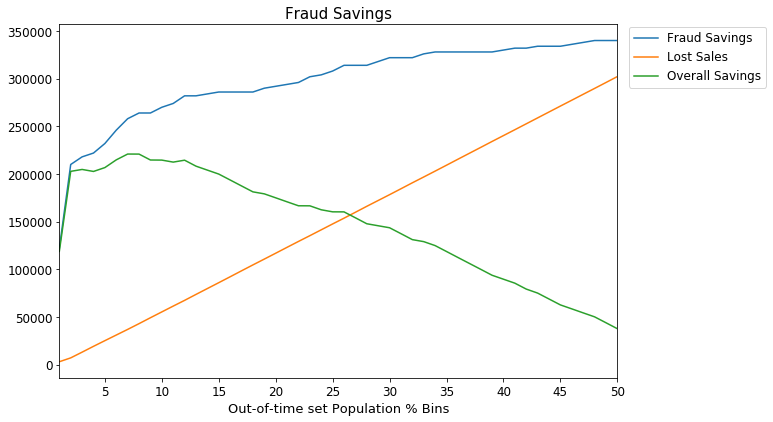

In [299]:
plt.figure(figsize=(10,6.5))

plt.plot(summary.iloc[:,0],summary.Cumulative_Bads.values*2000,label='Fraud Savings')
plt.plot(summary.iloc[:,0],summary.Cumulative_Goods.values*50,label='Lost Sales')
plt.plot(summary.iloc[:,0],summary.Cumulative_Bads.values*2000-summary.Cumulative_Goods.values*50,label='Overall Savings')
plt.xticks(range(0,51,5))
plt.xlim(1,50)
plt.title('Fraud Savings',fontsize=15)
plt.xlabel('Out-of-time set Population % Bins',fontsize=13)
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left',prop={'size': 12})
plt.show()

In [278]:
top_rows = int(len(new_oot)*0.07)
new_oot.sort_values('Fraud score',ascending=False).head(top_rows)

,card_zip_total_7,card_state_total_3,card_zip_total_30,card_zip_max_7,card_merch_max_30,card_zip_max_3,card_merch_max_3,card_merch_max_7,Cardnum_total_3,Cardnum_total_7,...,Merchnum_total_3,Cardnum_total_1,merch_state_total_7,Cardnum_max_1,Cardnum_total_14,Cardnum_max_14,card_state_avg_7,card_state_avg_3,Label,Fraud score
Recnum,,,,,,,,,,,,,,,,,,,,,
89474,6.825608,6.804760,6.441338,3.002652,2.868927,3.053890,3.066382,3.025345,4.470734,3.731893,...,5.336478,4.871190,4.295712,2.458729,2.750839,1.349809,0.963675,0.942651,1,0.965341
89473,6.739283,6.718611,6.359098,3.002652,2.868927,3.053890,3.066382,3.025345,4.412567,3.681818,...,5.267321,4.808700,4.238776,2.458729,2.712457,1.349809,1.002064,0.980116,1,0.965341
89466,6.631667,6.611214,6.256574,3.002652,2.868927,3.053890,3.066382,3.025345,4.340053,3.619391,...,5.181107,4.730797,4.167798,2.458729,2.664610,1.349809,1.038599,1.015772,1,0.965341
89459,6.078789,6.059459,5.729859,3.002652,2.868927,3.053890,3.066382,3.025345,3.967510,3.298675,...,4.738181,4.330571,3.803147,2.458729,2.418792,1.349809,1.107667,1.083179,1,0.963341
89462,6.173707,6.154185,5.820285,3.002652,2.868927,3.053890,3.066382,3.025345,4.031468,3.353736,...,4.814223,4.399282,3.865751,2.458729,2.460994,1.349809,1.060171,1.036826,1,0.963341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87492,-0.068960,-0.075787,-0.126974,-0.414939,-0.442721,-0.399026,-0.395007,-0.408381,-0.174986,-0.267536,...,-0.210288,-0.119759,-0.328554,-0.475064,-0.348000,-0.644033,-0.487171,-0.473295,0,0.017574
90609,0.275329,0.267801,0.201023,1.382059,1.298571,1.416546,1.425020,1.397101,0.057004,-0.067819,...,0.059095,0.129470,-0.106777,1.067549,-0.194924,0.404346,2.014795,1.968486,0,0.017552
95165,0.275276,0.267749,0.200973,1.381840,1.298359,1.416324,1.424798,1.396881,0.056968,-0.067850,...,0.059053,0.129432,-0.106811,1.067361,-0.194947,0.404218,2.014489,1.968188,0,0.017552


In [295]:
new_oot.sort_values('Fraud score',ascending=False)['Fraud score'][:5000]

Recnum
89474    0.965341
89473    0.965341
89466    0.965341
89459    0.963341
89462    0.963341
           ...   
86353    0.000208
85394    0.000208
89915    0.000208
92279    0.000208
95102    0.000208
Name: Fraud score, Length: 5000, dtype: float64

### Case Study: Fraud Score Increase with Activity

In [20]:
score_tt = final_model.predict_proba(X)[:,1]
score_oot = final_model.predict_proba(X_oot)[:,1]

In [22]:
new_tt = tt.copy()
new_oot = oot.copy()

In [23]:
new_tt['Fraud score'] = score_tt
new_oot['Fraud score'] = score_oot

In [25]:
final = pd.concat([new_tt,new_oot])
final

,card_zip_total_7,card_state_total_3,card_zip_total_30,card_zip_max_7,card_merch_max_30,card_zip_max_3,card_merch_max_3,card_merch_max_7,Cardnum_total_3,Cardnum_total_7,...,Merchnum_total_3,Cardnum_total_1,merch_state_total_7,Cardnum_max_1,Cardnum_total_14,Cardnum_max_14,card_state_avg_7,card_state_avg_3,Label,Fraud score
Recnum,,,,,,,,,,,,,,,,,,,,,
1,-0.164532,-0.171166,-0.218024,-0.444854,-0.471709,-0.429251,-0.425306,-0.438438,-0.239385,-0.322976,...,-0.293290,-0.188944,-0.396887,-0.500745,-0.390492,-0.661486,-0.528822,-0.513945,0,0.000000
2,-0.158151,-0.164798,-0.211945,-0.418352,-0.446028,-0.402475,-0.398464,-0.411810,-0.235086,-0.319275,...,-0.288178,-0.184324,-0.392679,-0.477994,-0.387655,-0.646024,-0.491923,-0.477933,0,0.000000
3,-0.124394,-0.131109,-0.179785,-0.278145,-0.310168,-0.260818,-0.256460,-0.270941,-0.212339,-0.299692,...,-0.261134,-0.159888,-0.370414,-0.357635,-0.372646,-0.564226,-0.296712,-0.287418,0,0.000000
4,-0.164532,-0.171166,-0.218024,-0.444854,-0.471709,-0.429251,-0.425306,-0.438438,-0.239385,-0.322976,...,-0.292624,-0.188944,-0.396339,-0.500745,-0.390492,-0.661486,-0.528822,-0.513945,0,0.000000
5,-0.163701,-0.170336,-0.217233,-0.444854,-0.471709,-0.429251,-0.425306,-0.438438,-0.238825,-0.322494,...,-0.291959,-0.188342,-0.395791,-0.500745,-0.390123,-0.661486,-0.528822,-0.513945,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96749,-0.145901,-0.152572,-0.200275,-0.367472,-0.396726,-0.351069,-0.346932,-0.360690,-0.226831,-0.312168,...,-0.278364,-0.175457,-0.384599,-0.434317,-0.382209,-0.616340,-0.421083,-0.408797,0,0.000000
96750,-0.138106,0.031014,-0.061679,-0.335097,0.079077,-0.318359,-0.314142,-0.328162,0.245739,0.094660,...,-0.272119,-0.055996,-0.379458,0.056883,0.434666,0.285123,0.054546,0.055391,0,0.000000
96751,-0.081914,-0.072257,-0.139316,-0.101711,-0.139203,-0.082561,-0.077765,-0.093674,0.021425,0.019815,...,0.769059,0.059880,0.577840,0.368465,-0.127756,-0.070760,-0.244661,-0.236619,0,0.013162


In [26]:
new_oot.tail()

,card_zip_total_7,card_state_total_3,card_zip_total_30,card_zip_max_7,card_merch_max_30,card_zip_max_3,card_merch_max_3,card_merch_max_7,Cardnum_total_3,Cardnum_total_7,...,Merchnum_total_3,Cardnum_total_1,merch_state_total_7,Cardnum_max_1,Cardnum_total_14,Cardnum_max_14,card_state_avg_7,card_state_avg_3,Label,Fraud score
Recnum,,,,,,,,,,,,,,,,,,,,,
96749,-0.145901,-0.152572,-0.200275,-0.367472,-0.396726,-0.351069,-0.346932,-0.360690,-0.226831,-0.312168,...,-0.278364,-0.175457,-0.384599,-0.434317,-0.382209,-0.616340,-0.421083,-0.408797,0,0.000000
96750,-0.138106,0.031014,-0.061679,-0.335097,0.079077,-0.318359,-0.314142,-0.328162,0.245739,0.094660,...,-0.272119,-0.055996,-0.379458,0.056883,0.434666,0.285123,0.054546,0.055391,0,0.000000
96751,-0.081914,-0.072257,-0.139316,-0.101711,-0.139203,-0.082561,-0.077765,-0.093674,0.021425,0.019815,...,0.769059,0.059880,0.577840,0.368465,-0.127756,-0.070760,-0.244661,-0.236619,0,0.013162
96752,0.340073,0.332414,0.381572,1.650966,1.559143,1.688233,1.697373,1.667278,0.100630,-0.030262,...,0.758089,0.176338,0.514409,1.298390,-0.004645,0.561228,2.389195,2.333880,0,0.010420
96753,0.721622,0.713187,0.626197,2.547568,0.037313,2.594102,0.106732,0.089349,0.758800,0.536346,...,-0.161228,-0.097387,-0.288163,-0.049801,1.405901,3.210246,0.748680,0.732828,0,0.077252


In [38]:
final = final.iloc[:,-2:]

In [33]:
df = pd.read_csv('cleaned_data_v2.csv', index_col = 0).set_index('Recnum')

In [34]:
df

,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Recnum,,,,,,,,,
1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...
96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0


In [39]:
final['Date'] = final.index.map(df.Date)
final['Cardnum'] = final.index.map(df.Cardnum)
final['Merchnum'] = final.index.map(df.Merchnum)

In [40]:
final

,Label,Fraud score,Date,Cardnum,Merchnum
Recnum,,,,,
1,0,0.000000,2010-01-01,5142190439,5509006296254
2,0,0.000000,2010-01-01,5142183973,61003026333
3,0,0.000000,2010-01-01,5142131721,4503082993600
4,0,0.000000,2010-01-01,5142148452,5509006296254
5,0,0.000000,2010-01-01,5142190439,5509006296254
...,...,...,...,...,...
96749,0,0.000000,2010-12-31,5142276053,3500000006160
96750,0,0.000000,2010-12-31,5142225701,8090710030950
96751,0,0.013162,2010-12-31,5142226486,4503057341100


In [44]:
final.dtypes

Label            int64
Fraud score    float64
Date            object
Cardnum          int64
Merchnum        object
dtype: object

In [62]:
final.Date = pd.to_datetime(final.Date)

In [88]:
final[final['Fraud score']>0.8].Cardnum.value_counts().head(30)

5142220919    34
5142214614    32
5142182128    27
5142179617    24
5142271065    23
5142111125    21
5142176939    16
5142116864    16
5142299705    15
5142183973    15
5142235211    13
5142288601     1
Name: Cardnum, dtype: int64

In [108]:
temp = final[final.Cardnum == 5142183973]

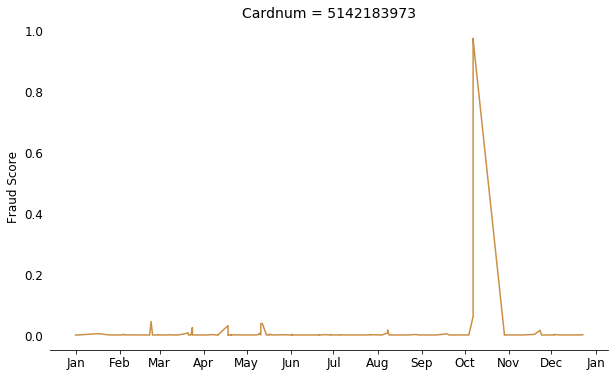

In [140]:
plt.figure(figsize=(10,6))
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

plt.plot(temp.Date,temp['Fraud score'],color='#ca8f45')
ax = plt.gca()
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.tick_params(axis='y',color='white')
plt.ylabel('Fraud Score',fontsize=12)
plt.title('Cardnum = 5142183973',fontsize = 14)
sns.despine(left=True)
plt.show()

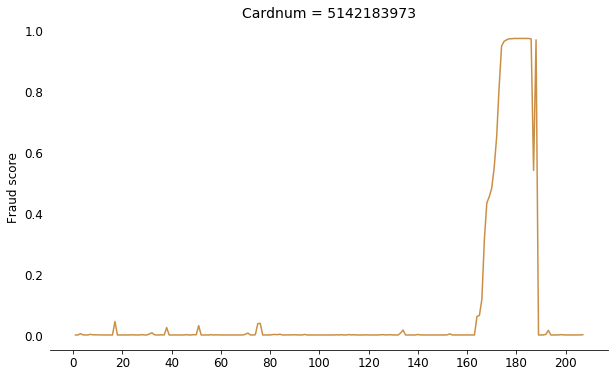

In [141]:
plt.figure(figsize=(10,6))
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

plt.plot(range(1,len(temp)+1),temp['Fraud score'],color='#ca8f45')
plt.xticks(range(0,208,20))
ax = plt.gca()
ax.tick_params(axis='y',color='white')
plt.ylabel('Fraud score',fontsize=12)
plt.title('Cardnum = 5142183973',fontsize = 14)
sns.despine(left=True)
plt.show()

In [142]:
final[final['Fraud score']>0.8].Merchnum.value_counts().head(30)

4353000719908    29
253052983001     25
4620009957157    23
4503082476300    17
6005030600003    15
6070095870009    15
4591200814444     6
5725000466504     3
9900000037306     2
138909135337      2
4063000739258     2
80600010008       2
4574100694444     2
6354700620006     2
9420966047982     1
7736486890214     1
460450006HRI6     1
3910065100000     1
08-3500004724     1
6635700620033     1
4895900686387     1
600602032149      1
970611866225      1
8009008586740     1
8009430721000     1
7593860048779     1
6002260019526     1
4620006308197     1
3497302000725     1
991904668332      1
Name: Merchnum, dtype: int64

In [175]:
temp2 = final[final.Merchnum == '6005030600003']

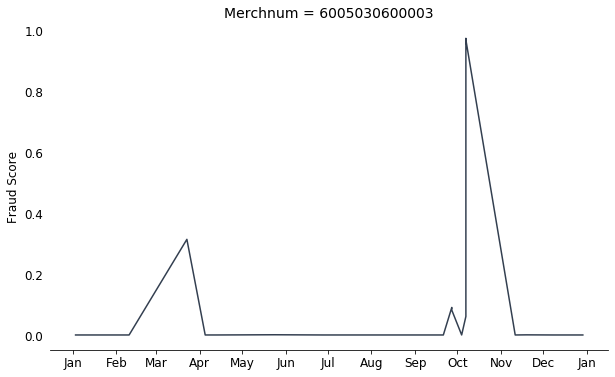

In [182]:
plt.figure(figsize=(10,6))
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

plt.plot(temp2.Date,temp2['Fraud score'],color='#333f50')
ax = plt.gca()
date_form = DateFormatter("%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.tick_params(axis='y',color='white')
plt.ylabel('Fraud Score',fontsize=12)
plt.title('Merchnum = 6005030600003',fontsize = 14)
sns.despine(left=True)
plt.show()

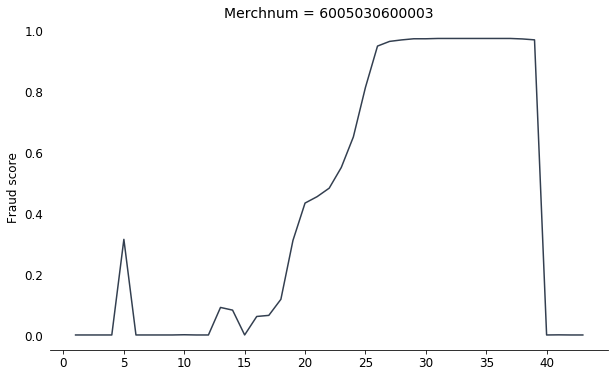

In [184]:
plt.figure(figsize=(10,6))
plt.rc('ytick', labelsize=12)
plt.rc('xtick', labelsize=12)

plt.plot(range(1,len(temp2)+1),temp2['Fraud score'],color='#333f50')
plt.xticks(range(0,43,5))
ax = plt.gca()
ax.tick_params(axis='y',color='white')
plt.ylabel('Fraud score',fontsize=12)
plt.title('Merchnum = 6005030600003',fontsize = 14)
sns.despine(left=True)
plt.show()